Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Dataset:Bank_Personal_Loan_Modelling-1.csv

Column description: TheraBank_Column_Description.xlsx

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading Data

In [253]:
tb = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
tb.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [73]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            4971 non-null float64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [17]:
tb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Observations on the given data
The minimum value for Experiene is showing negative data. this is incorrect and hence we need to correct this.

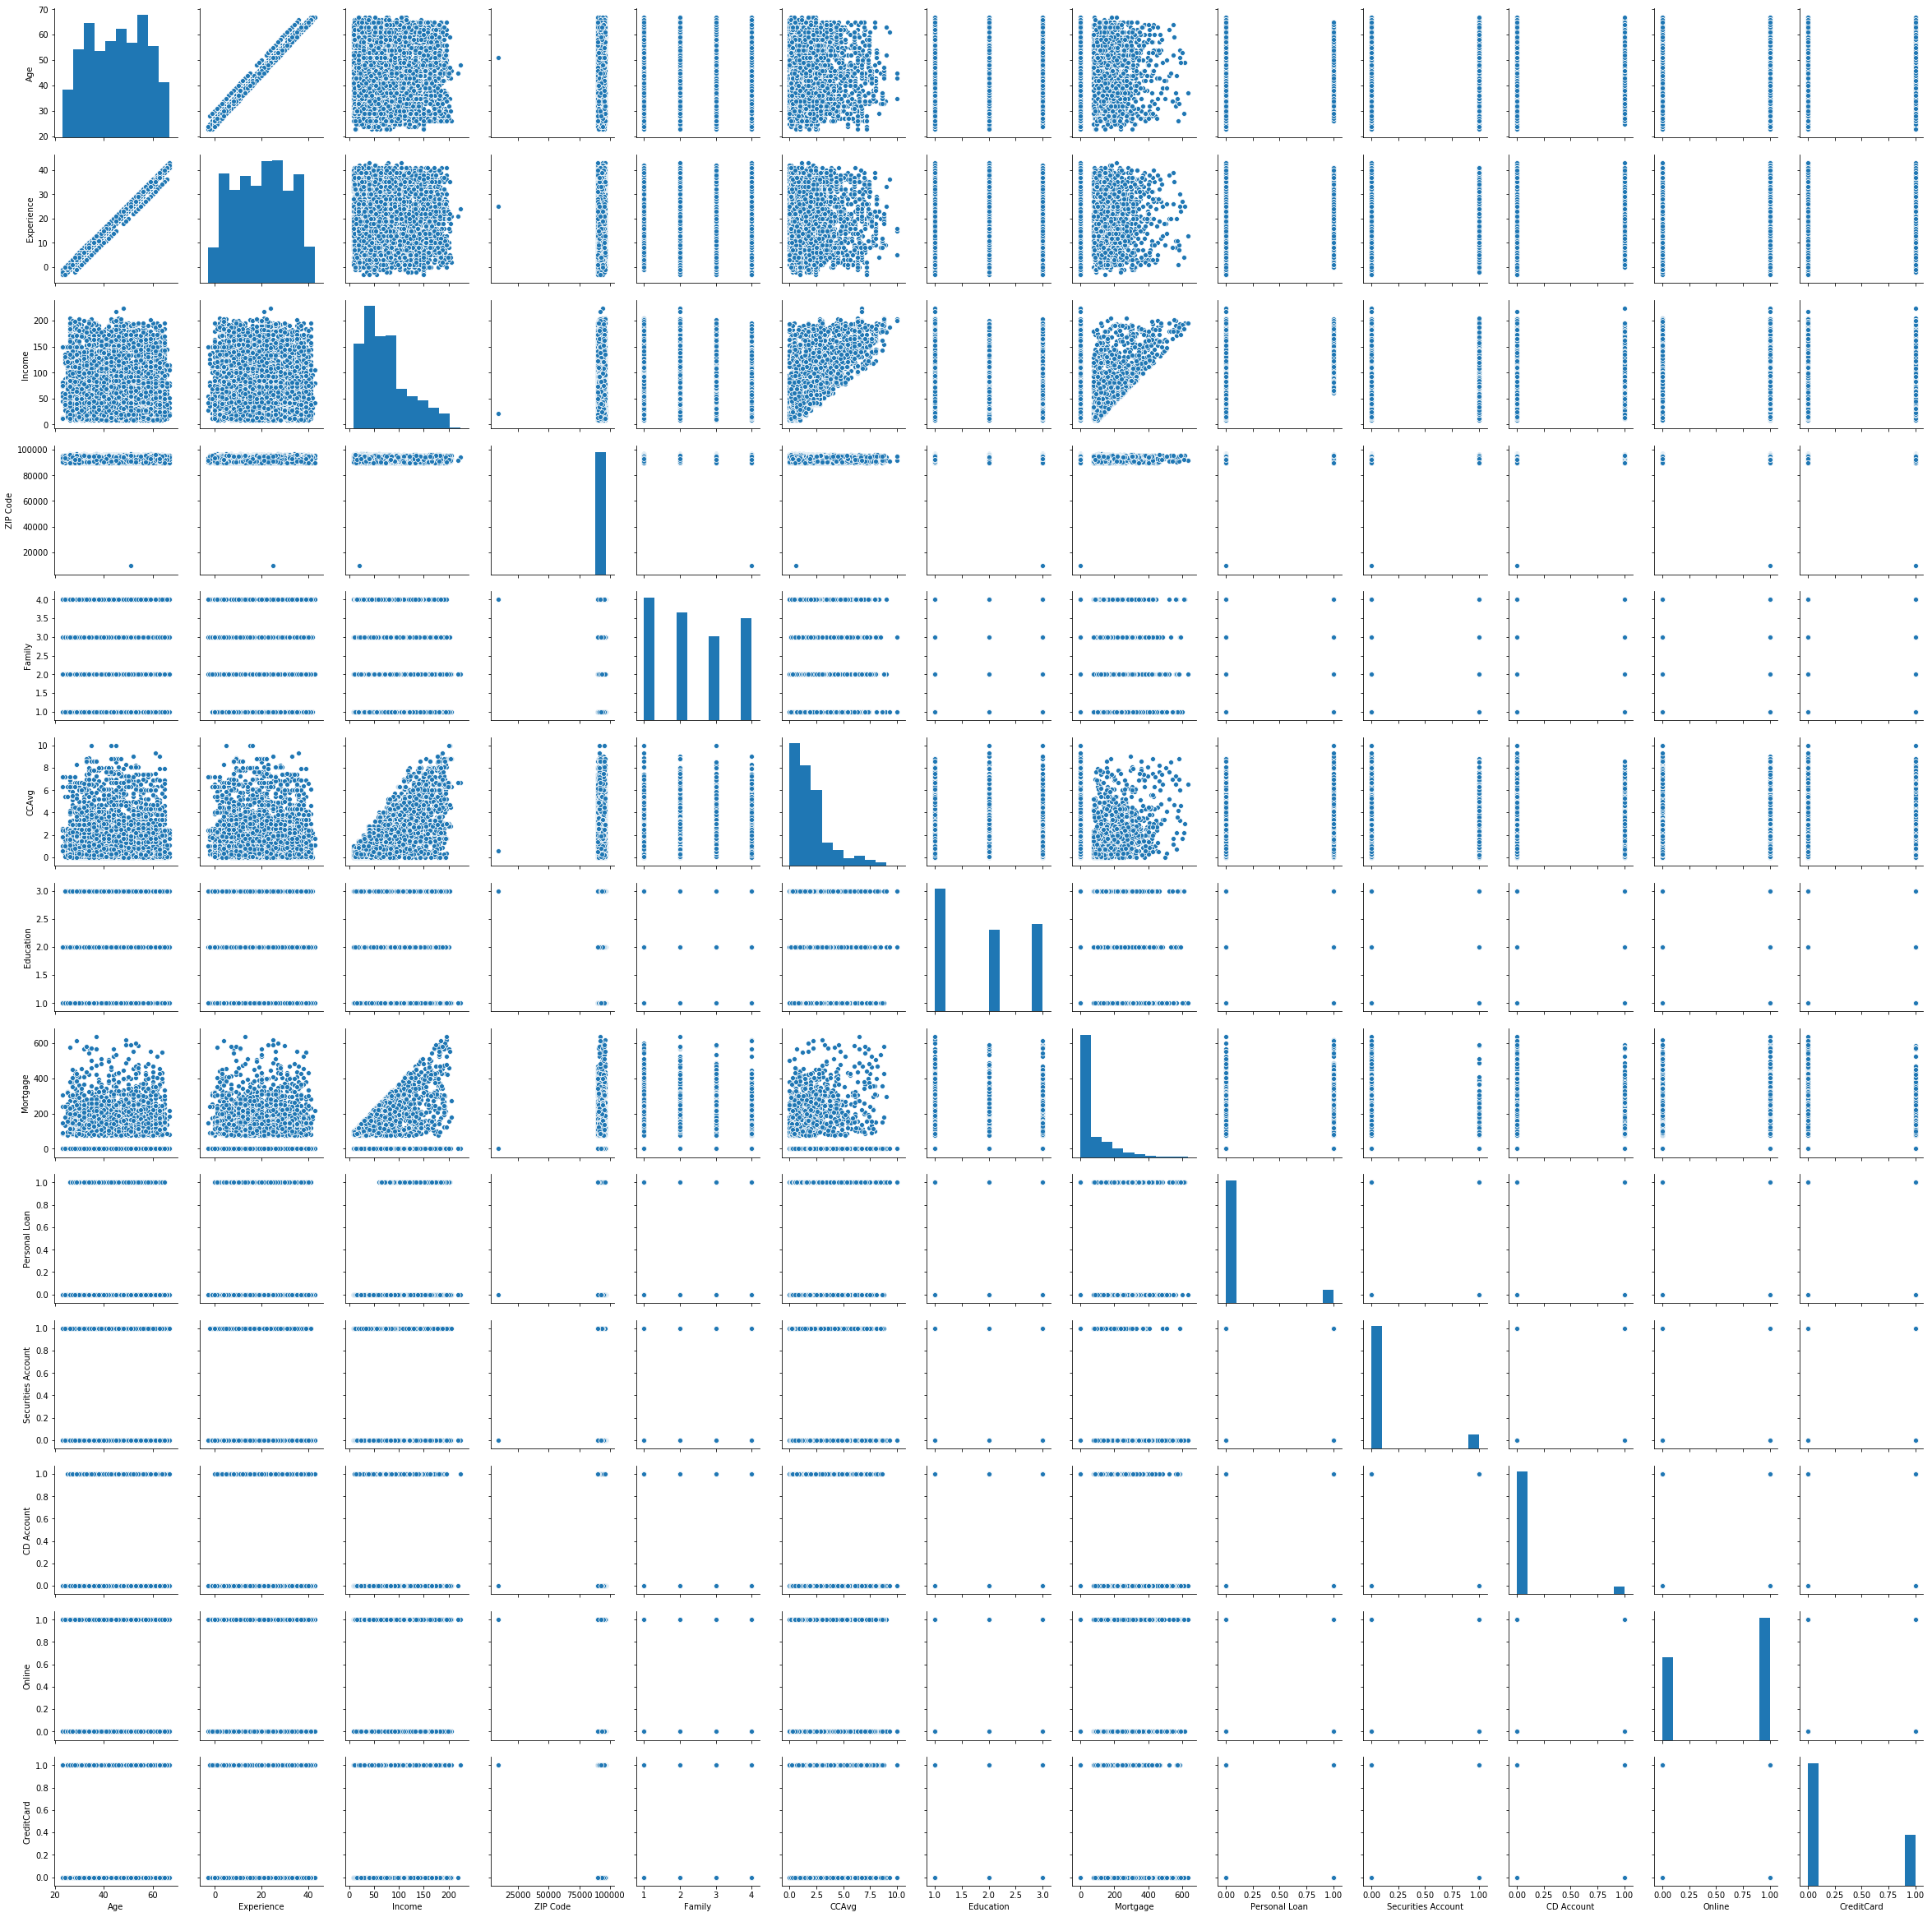

In [10]:
## Data Dsitribution Chart
plt = sns.pairplot(tb.iloc[:,1:])

In [13]:
#tb.iloc[:,1:]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


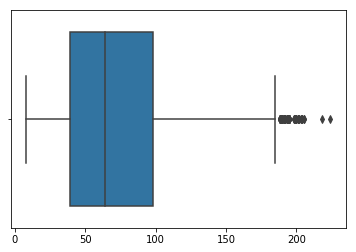

In [14]:
plt = sns.boxplot(df[['Income']])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


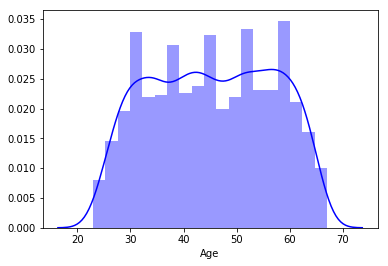

In [15]:
sns.distplot( df['Age'], color = 'b')

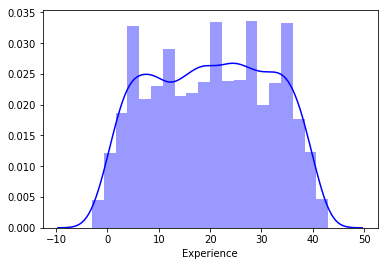

In [18]:
sns.distplot( df['Experience'], color = 'b')

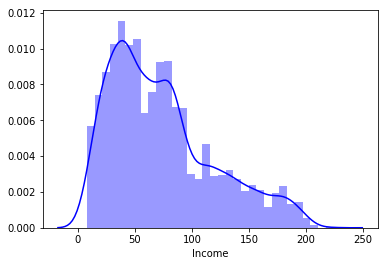

In [19]:
sns.distplot( df['Income'], color = 'b')

###### Based on the above 3 plots, we can say that most of the customers:
1. fall in the range of 30 to 60 years, 
2. have experience in the range of 5 to 35 years, and
3. are earning as income in the range from 10k to 100k

### Negative Experience cleansing

In [21]:
# First lts see how many records are having negative experince

tb[tb['Experience'] < 0]['Experience'].count()

52

In [ ]:
# As we ca nsee there are 52 records with negative experience. We nee to clean these negative values.

In [22]:
#clean the negative variable
tbExp = tb.loc[tb['Experience'] >0]
negExp = tb.Experience < 0
column_name = 'Experience'
mylist = tb.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [23]:
# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [24]:
for id in mylist:
    age = tb.loc[np.where(tb['ID']==id)]["Age"].tolist()[0]
    education = tb.loc[np.where(tb['ID']==id)]["Education"].tolist()[0]
    tb_filtered = tbExp[(tbExp.Age == age) & (tbExp.Education == education)]
    exp = tb_filtered['Experience'].median()
    tb.loc[tb.loc[np.where(tb['ID']==id)].index, 'Experience'] = exp

In [ ]:
# The above code does the below steps:

# a. For the record with the ID, get the value of Age column 
# b. For the record with the ID, get the value of Education column
# c. Filter the records matching the above criteria from the data set which has records with positive experience and 
#    take the median
# d. Apply the median back to the location which had negative experience

In [25]:
# checking if there are records with negative experience
tb[tb['Experience'] < 0]['Experience'].count()

0

In [26]:
tb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Effect of Income and education on whether a customer takes Personal Loan

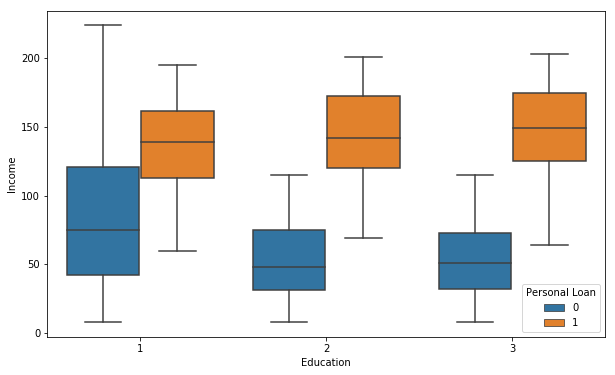

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Education', y = 'Income', hue = 'Personal Loan', data = tb)

### Observation
The boxplot shows that the customers with education level 1 have higher income. However, the customers who go for personal loans have the same income distribution regardless of their education level.

### Effect of Income and education on whether a customer takes Personal Loan

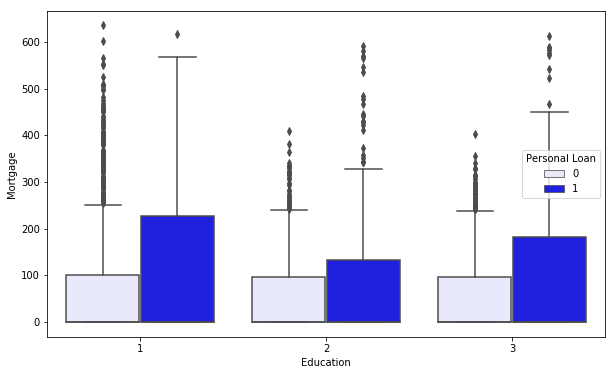

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=tb ,color='blue')

### Observation
The customers with personal loan also have higher mortgages.

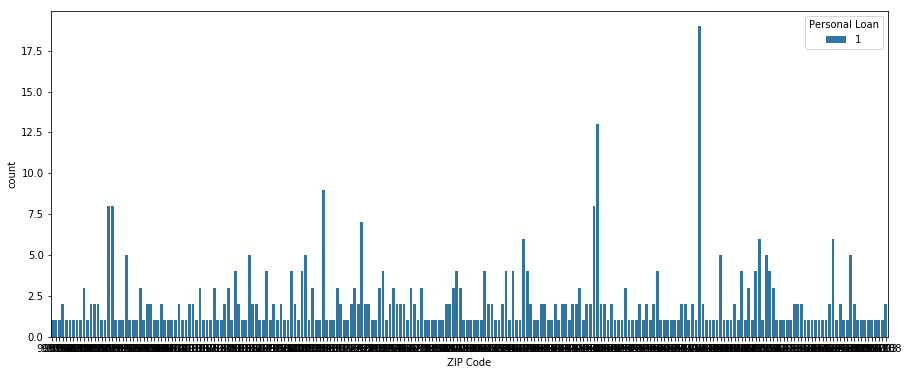

In [70]:
plt.figure(figsize=(15, 6))
sns.countplot(x="ZIP Code", data=tb[tb['Personal Loan']==1], hue ="Personal Loan",orient ='v')

In [71]:
zipcd_top5 = tb[tb['Personal Loan']==1]['ZIP Code'].value_counts().head(5)
zipcd_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIP Code, dtype: int64

### Observation
The top 5 zip codes that applied for Personal loan.

### Influence of Family on whether a customer applies for Personal loan

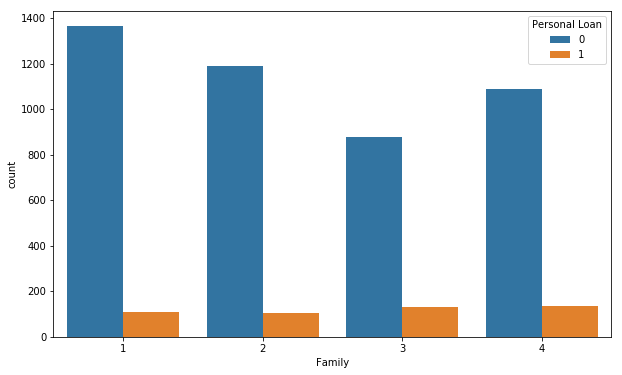

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Family', data = tb, hue = 'Personal Loan')

#### Does family size influence personal loans?

Family size does not have any impact in personal loan. 
But it seems families with size of 3 or more are more likely to take loan. 
When considering future campaign this might be good association.

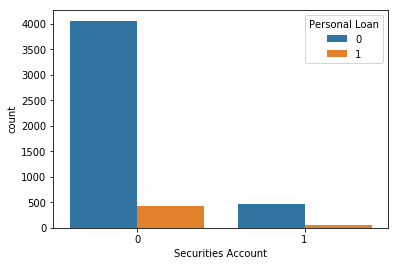

In [84]:
#plt.figure(figsize=(10, 6))
sns.countplot(x = 'Securities Account', hue = 'Personal Loan', data = tb)

### Observation
Majority of customers who do not have loan also do not have Securities Account.

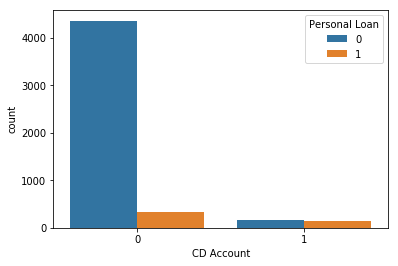

In [86]:
sns.countplot(x = 'CD Account', hue = 'Personal Loan', data = tb)

### Observation
Customers who do not have CD account, do not have loan as well. This goes with the mojority of the customers. 
But almost all customers who have CD account have loan as well.

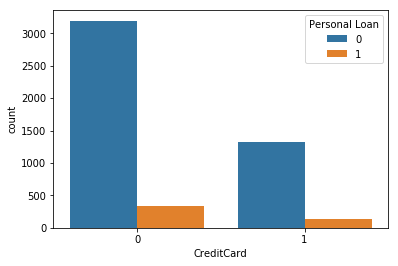

In [88]:
sns.countplot(x = 'CreditCard', hue = 'Personal Loan', data = tb)

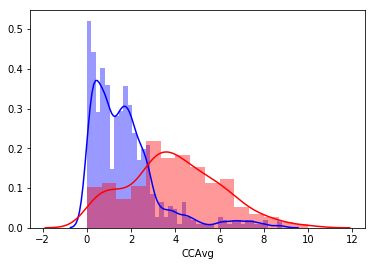

In [90]:
sns.distplot( tb[tb['Personal Loan'] == 0]['CCAvg'], color = 'b')
sns.distplot( tb[tb['Personal Loan'] == 1]['CCAvg'], color = 'r')

### Observation
Customers who have taken personal loan have higher credit card average than those who did not take. 
Therefore, high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

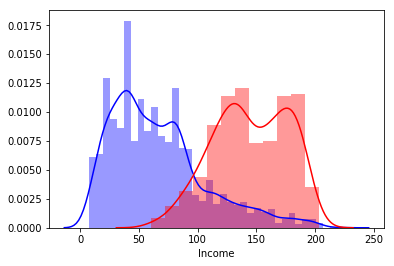

In [99]:
sns.distplot( tb[tb['Personal Loan'] == 0]['Income'], color = 'b')
sns.distplot( tb[tb['Personal Loan'] == 1]['Income'], color = 'r')

### Observation
It seems customers who have less income have not applied for personal loans and customers who have more income have applied for
personal loans.

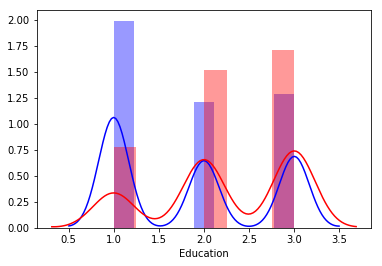

In [100]:
sns.distplot( tb[tb['Personal Loan'] == 0]['Education'], color = 'b')
sns.distplot( tb[tb['Personal Loan'] == 1]['Education'], color = 'r')

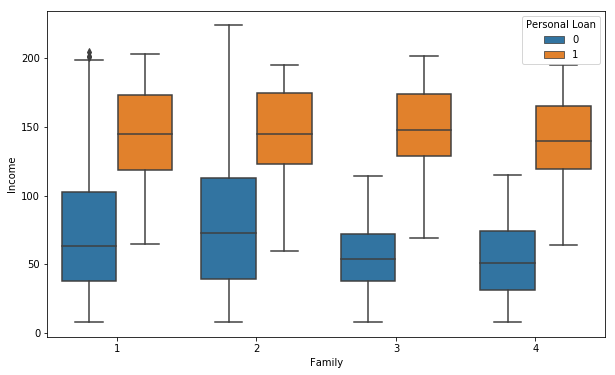

In [105]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = tb.Family , y = tb.Income, hue= tb['Personal Loan'])
# Looking at the below plot, families with income less than 100K are less likely to take loan than the families with 
# high income

### Correlation comparison with a Heat map

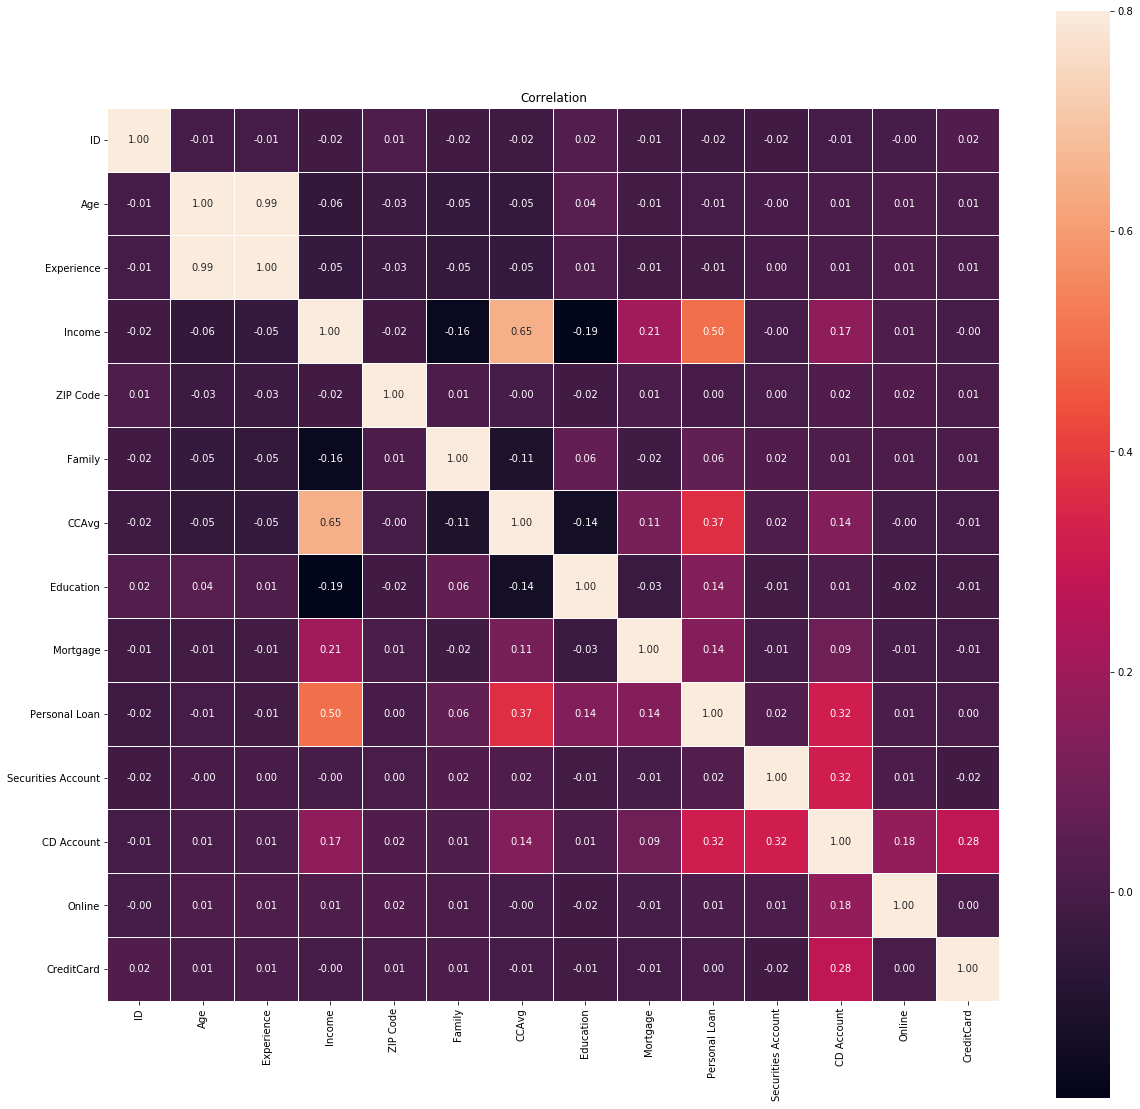

In [102]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(tb.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

### Observation

1. Age and Experience are highly correlated.
2. Income and CCAvg are moderately corelated.

### Splitting data into Train and Test datasets

In [106]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(tb.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=80)

In [107]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [109]:
train_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,3500.0,45.384571,11.565764,23.0,35.0,45.5,55.0,67.0
Income,3500.0,73.112857,45.985349,8.0,38.0,62.0,98.0,224.0
ZIP Code,3500.0,93139.171714,2269.619645,9307.0,91902.0,93437.0,94608.0,96651.0
Family,3500.0,2.391143,1.154477,1.0,1.0,2.0,3.0,4.0
CCAvg,3500.0,1.911571,1.732807,0.0,0.7,1.5,2.5,10.0
Education,3500.0,1.879429,0.840038,1.0,1.0,2.0,3.0,3.0
Mortgage,3500.0,57.117143,102.133956,0.0,0.0,0.0,102.0,635.0
Securities Account,3500.0,0.106286,0.308247,0.0,0.0,0.0,0.0,1.0
CD Account,3500.0,0.059143,0.235926,0.0,0.0,0.0,0.0,1.0
Online,3500.0,0.594000,0.491155,0.0,0.0,1.0,1.0,1.0


In [110]:
test_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,45.230667,11.223195,23.0,36.00,45.0,55.00,67.0
Income,1500.0,75.317333,46.124892,8.0,40.00,68.0,99.25,218.0
ZIP Code,1500.0,93183.609333,1728.919068,90007.0,92007.75,93407.0,94608.00,96150.0
Family,1500.0,2.408667,1.131892,1.0,1.00,2.0,3.00,4.0
CCAvg,1500.0,1.999460,1.780897,0.0,0.70,1.6,2.60,9.0
Education,1500.0,1.884667,0.839743,1.0,1.00,2.0,3.00,3.0
Mortgage,1500.0,55.056000,100.745736,0.0,0.00,0.0,98.00,587.0
Securities Account,1500.0,0.100000,0.300100,0.0,0.00,0.0,0.00,1.0
CD Account,1500.0,0.063333,0.243643,0.0,0.00,0.0,0.00,1.0
Online,1500.0,0.603333,0.489369,0.0,0.00,1.0,1.00,1.0


### Naive Bayes

In [172]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8826666666666667

In [173]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1238,62
Yes,114,86


### KNN ( K - Nearest Neighbour )

In [225]:
x = tb.drop(['ID','Experience'], axis=1)
y = tb['Personal Loan']

In [226]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)  

In [227]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [228]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [229]:
y_pred = classifier.predict(X_test)  
y_pred
y_pred1=pd.DataFrame(y_pred)

In [230]:
df_c = pd.concat([y_pred1.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
df_c

,0,Personal Loan
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [231]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[1353    0]
 [   0  147]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1353
          1       1.00      1.00      1.00       147

avg / total       1.00      1.00      1.00      1500



In [232]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [233]:
y_test_np=np.asarray(y_test)

In [234]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test_np))

In [235]:
error

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

Text(0, 0.5, 'Mean Error')

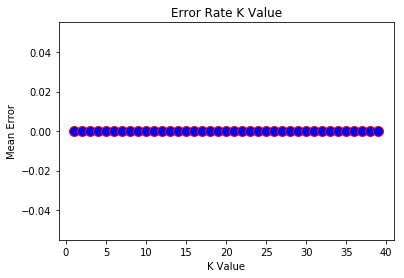

In [236]:
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [237]:
# Splitting test and train data sets
train_set_indep = tb.drop(['Experience' ,'ID'] , axis = 1).drop(labels= 'Personal Loan' , axis = 1)
train_set_dep = tb['Personal Loan']
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :] # 70:30 of 5000 records become first 3500 records for training and  
X_Test = X[3501: , :]  # from 3501 onwards to 5000 for testing
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [238]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


In [239]:
print(confusion_matrix(Y_Test, predicted))  
print(classification_report(Y_Test, predicted))  
print(accuracy_score(Y_Test, predicted))

[[1359   14]
 [ 120    6]]
             precision    recall  f1-score   support

          0       0.92      0.99      0.95      1373
          1       0.30      0.05      0.08       126

avg / total       0.87      0.91      0.88      1499

0.9106070713809206


### Logistic Regression

In [186]:
tb['Personal Loan'].value_counts()
# The target column is having binary distribution and all the columns are numerical, we can proceed with the model building

0    4520
1     480
Name: Personal Loan, dtype: int64

In [121]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [123]:
X = tb.drop(['ID','Experience'], axis=1)
X.head(2)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0


In [126]:
y = tb['Personal Loan']

0    4520
1     480
Name: Personal Loan, dtype: int64

In [247]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=5)

In [128]:
x_train.shape, y_train.shape

((3500, 12), (3500,))

In [129]:
x_test.shape, y_test.shape

((1500, 12), (1500,))

In [248]:
# Training and fitting model
model=LogisticRegression(penalty='l2', max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [249]:
prediction=model.predict(x_test)

In [250]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9113333333333333

In [162]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [251]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[1319   32]
 [ 101   48]]


### Model comparison

In [254]:
A=tb.drop(['Personal Loan','Experience','ID'], axis=1)
b=tb.pop('Personal Loan')

NB: 0.885600 (0.010385)
KNN: 0.898600 (0.008902)
LOG: 0.907600 (0.007838)


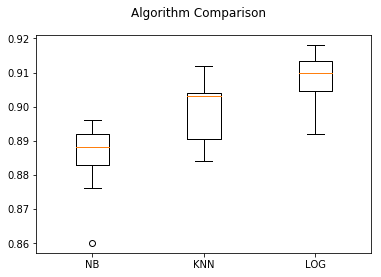

In [255]:
models = []
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOG', LogisticRegression()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Conclusion

The main aim of the bank is to convert their Liability customers into Personal Loan customers. They are planning to set up a new marketing campaigna and hence, they need information regarding the connections between various attributes given in the dataset. Three classification models/algorithms were used in the above study. 
And from the above graph, it seems like the Logistic Regression model/algorithm has the highest accuracy and thus, we can choose that as our final model.